# **Regression problem with ANN**

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
housing_data = fetch_california_housing()
print(housing_data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
print(housing_data.DESCR) # Dataset secription
print(housing_data.feature_names) # Predictor column names
print(housing_data.target_names) # Target variable

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
# Split the data into training, validation and testing data

x_train_full, x_test, y_train_full, y_test = train_test_split(housing_data.data, housing_data.target, test_size=0.2, random_state=365)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=365)

In [5]:
# Transform the data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Set seed
np.random.seed(365)
tf.random.set_seed(365)

In [7]:
print(x_train_scaled.shape, x_valid_scaled.shape, x_test_scaled.shape)

(13209, 8) (3303, 8) (4128, 8)


In [8]:
# Arrange layers

input = keras.layers.Input(shape=(x_train.shape[1],))
hidden_1 = keras.layers.Dense(32, activation='relu')(input)
hidden_2 = keras.layers.Dense(32, activation='relu')(hidden_1)
hidden_3 = keras.layers.Dense(32, activation='relu')(hidden_2)
concat = keras.layers.concatenate([input, hidden_3])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [9]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        288 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      1,056 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      1,056 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 40)        │          0 │ input_layer[0][0… │
│ (Concatenate)       │                   │            │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         41 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,441 (9.54 KB)

 Trainable params: 2,441 (9.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam(learning_rate=1e-3),
             metrics=['mean_absolute_error'])

In [11]:
# Set early stopping callbacks and save best model

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('model_cb.keras', save_best_only=True)

In [12]:
# Fit the model

model_history = model.fit(x_train_scaled, y_train, 
                          epochs=100, 
                          validation_data=(x_valid_scaled, y_valid),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.8675 - mean_absolute_error: 0.9545 - val_loss: 0.4845 - val_mean_absolute_error: 0.4893
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.5086 - mean_absolute_error: 0.4944 - val_loss: 0.4192 - val_mean_absolute_error: 0.4499
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.4488 - mean_absolute_error: 0.4646 - val_loss: 0.3744 - val_mean_absolute_error: 0.4261
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.3907 - mean_absolute_error: 0.4433 - val_loss: 0.3667 - val_mean_absolute_error: 0.4193
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.3807 - mean_absolute_error: 0.4349 - val_loss: 0.3491 - val_mean_absolute_error: 0.4081
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3599 - mean_absolute_error: 0.4245 - val_loss: 0.3519 - val_mean_absolute_error: 0.4084
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3627 - mean_absolute_error: 0

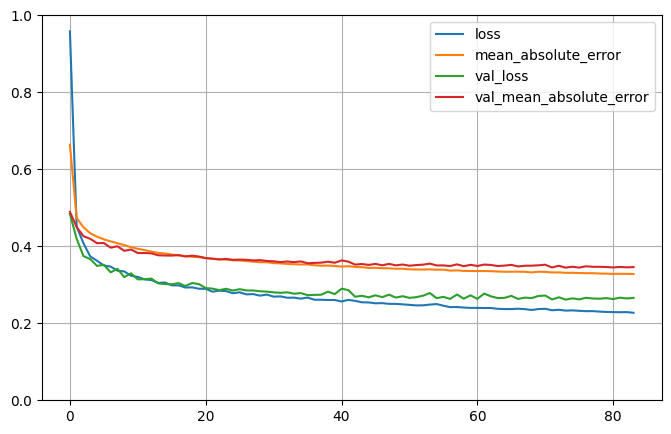

In [13]:
# Plot the actual data and validation data loss and accuracy

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Model test accuracy

mae_test = model.evaluate(x_test_scaled, y_test)
mae_test

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2951 - mean_absolute_error: 0.3601


[0.2731514275074005, 0.34724777936935425]

In [15]:
x_new = x_test_scaled[:3]

In [16]:
# Test on unseen data

y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
[[1.7627319]
 [1.3913616]
 [2.6910744]]
[2.263 1.07  2.734]
